# Pandas Series Exercises

## Use pandas to create a Series from the following data:

```python
["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"]```

In [1]:
import pandas as pd #Convention is to import the pandas module with the alias pd.

In [2]:
fruits = pd.Series(["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"])
type(fruits)

pandas.core.series.Series

In [3]:
fruits.name = 'fruits'
fruits

0                 kiwi
1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
9                 kiwi
10                kiwi
11                kiwi
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
Name: fruits, dtype: object

#### Run `.describe()` on the series to see what describe returns for a series of strings.

In [4]:
fruits.describe()

count       17
unique      13
top       kiwi
freq         4
Name: fruits, dtype: object

#### Run the code necessary to produce only the unique fruit names.

In [5]:
fruits.unique()

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew',
       'blueberry', 'blackberry', 'gooseberry', 'papaya'], dtype=object)

#### Determine how many times each value occurs in the series.

In [6]:
freq = fruits.value_counts()
print(freq)
print(freq[-1])

kiwi                4
mango               2
blackberry          1
honeydew            1
gala apple          1
blueberry           1
papaya              1
honeycrisp apple    1
watermelon          1
strawberry          1
tomato              1
gooseberry          1
pineapple           1
Name: fruits, dtype: int64
1


#### Determine the most frequently occurring fruit name from the series.

In [7]:
fruits.mode().iloc[0]

'kiwi'

#### Determine the least frequently occurring fruit name from the series.

In [8]:
# We can create a function that will print out all of the least frequently occuring fruits
def least_frequent(series):
    freq = fruits.value_counts() 
    for i in range(len(freq)):
        if freq[i] == freq[-1]:
            print(freq.index[i])
            
least_frequent(fruits)

blackberry
honeydew
gala apple
blueberry
papaya
honeycrisp apple
watermelon
strawberry
tomato
gooseberry
pineapple


In [9]:
# Or we can use the .nsmallest() to select only the smallest values
fruits.value_counts().nsmallest(keep = 'all')

blackberry          1
honeydew            1
gala apple          1
blueberry           1
papaya              1
honeycrisp apple    1
watermelon          1
strawberry          1
tomato              1
gooseberry          1
pineapple           1
Name: fruits, dtype: int64

#### Write the code to get the longest string from the fruits series.

In [10]:
string_lengths = fruits.str.len()
string_lengths

0      4
1      5
2     10
3      9
4     10
5     16
6      6
7     10
8      8
9      4
10     4
11     4
12     5
13     9
14    10
15    10
16     6
Name: fruits, dtype: int64

In [11]:
string_lengths.idxmax()

5

In [12]:
fruits[string_lengths.idxmax()]

'honeycrisp apple'

In [13]:
fruits[fruits.str.len().idxmax()]
# Need to figure out how to return a tie for max

'honeycrisp apple'

In [14]:
longest_string = max(fruits, key=len)
longest_string
# Need to figure out how to return a tie for max

'honeycrisp apple'

#### Find the fruit(s) with 5 or more letters in the name.

In [15]:
fruits.str.len() >= 5

0     False
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9     False
10    False
11    False
12     True
13     True
14     True
15     True
16     True
Name: fruits, dtype: bool

In [16]:
fruits[fruits.str.len() >= 5]

1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
Name: fruits, dtype: object

#### Capitalize all the fruit strings in the series.

In [17]:
fruits.str.capitalize()

0                 Kiwi
1                Mango
2           Strawberry
3            Pineapple
4           Gala apple
5     Honeycrisp apple
6               Tomato
7           Watermelon
8             Honeydew
9                 Kiwi
10                Kiwi
11                Kiwi
12               Mango
13           Blueberry
14          Blackberry
15          Gooseberry
16              Papaya
Name: fruits, dtype: object

#### Count the letter "a" in all the fruits (use string vectorization)

In [18]:
fruits.str.count('a')

0     0
1     1
2     1
3     1
4     3
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    1
15    0
16    3
Name: fruits, dtype: int64

#### Output the number of vowels in each and every fruit.

In [19]:
fruits.str.lower().str.count(r'[aeiou]')

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
Name: fruits, dtype: int64

In [20]:
fruits.str.lower().str.count('[aeiou]')

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
Name: fruits, dtype: int64

#### Use the .apply method and a lambda function to find the fruit(s) containing two or more "o" letters in the name.

In [21]:
fruits[fruits.apply(lambda fruit: fruit.count('o') >= 2)]

6         tomato
15    gooseberry
Name: fruits, dtype: object

#### Write the code to get only the fruits containing "berry" in the name

In [22]:
fruits[fruits.apply(lambda fruit: fruit.count('berry') > 0)]

2     strawberry
13     blueberry
14    blackberry
15    gooseberry
Name: fruits, dtype: object

#### Write the code to get only the fruits containing "apple" in the name

In [23]:
fruits[fruits.apply(lambda fruit: fruit.count('apple') > 0)]

3           pineapple
4          gala apple
5    honeycrisp apple
Name: fruits, dtype: object

#### Which fruit has the highest amount of vowels?

In [24]:
fruits[max(fruits.str.lower().str.count('[aeiou]'))]

'honeycrisp apple'

## Use pandas to create a Series from the following data:

```python
['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23']```

In [25]:
money = pd.Series(['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23'])

In [26]:
money

0       $796,459.41
1           $278.60
2       $482,571.67
3     $4,503,915.98
4      $2,121,418.3
5      $1,260,813.3
6        $87,231.01
7     $1,509,175.45
8     $4,138,548.00
9     $2,848,913.80
10      $594,715.39
11    $4,789,988.17
12     $4,513,644.5
13    $3,191,059.97
14    $1,758,712.24
15    $4,338,283.54
16    $4,738,303.38
17    $2,791,759.67
18      $769,681.94
19      $452,650.23
dtype: object

#### What is the data type of the series?

In [27]:
money.dtype
# 'O' = object

dtype('O')

#### Use series operations to convert the series to a numeric data type.

In [28]:
money_clean = money.str.replace('$', '', regex=True)
money_clean = money_clean.str.replace(',', '', regex=True)
money_clean = money_clean.astype('float')
money_clean

0      796459.41
1         278.60
2      482571.67
3     4503915.98
4     2121418.30
5     1260813.30
6       87231.01
7     1509175.45
8     4138548.00
9     2848913.80
10     594715.39
11    4789988.17
12    4513644.50
13    3191059.97
14    1758712.24
15    4338283.54
16    4738303.38
17    2791759.67
18     769681.94
19     452650.23
dtype: float64

#### What is the maximum value? The minimum?

In [29]:
print(f"The maximum value was {money_clean.max()}.")
print(f"The minimum value was {money_clean.min()}.")

The maximum value was 4789988.17.
The minimum value was 278.6.


#### Bin the data into 4 equally sized intervals and show how many values fall into each bin.

In [30]:
pd.cut(money_clean, 4)

0        (-4511.11, 1197705.993]
1        (-4511.11, 1197705.993]
2        (-4511.11, 1197705.993]
3      (3592560.778, 4789988.17]
4     (1197705.993, 2395133.385]
5     (1197705.993, 2395133.385]
6        (-4511.11, 1197705.993]
7     (1197705.993, 2395133.385]
8      (3592560.778, 4789988.17]
9     (2395133.385, 3592560.778]
10       (-4511.11, 1197705.993]
11     (3592560.778, 4789988.17]
12     (3592560.778, 4789988.17]
13    (2395133.385, 3592560.778]
14    (1197705.993, 2395133.385]
15     (3592560.778, 4789988.17]
16     (3592560.778, 4789988.17]
17    (2395133.385, 3592560.778]
18       (-4511.11, 1197705.993]
19       (-4511.11, 1197705.993]
dtype: category
Categories (4, interval[float64]): [(-4511.11, 1197705.993] < (1197705.993, 2395133.385] < (2395133.385, 3592560.778] < (3592560.778, 4789988.17]]

In [31]:
q = pd.qcut(money_clean, 4)
qcount = q.value_counts()
print(q)
print(qcount)

0             (725940.302, 1940065.27]
1     (278.59900000000005, 725940.302]
2     (278.59900000000005, 725940.302]
3            (4188481.885, 4789988.17]
4            (1940065.27, 4188481.885]
5             (725940.302, 1940065.27]
6     (278.59900000000005, 725940.302]
7             (725940.302, 1940065.27]
8            (1940065.27, 4188481.885]
9            (1940065.27, 4188481.885]
10    (278.59900000000005, 725940.302]
11           (4188481.885, 4789988.17]
12           (4188481.885, 4789988.17]
13           (1940065.27, 4188481.885]
14            (725940.302, 1940065.27]
15           (4188481.885, 4789988.17]
16           (4188481.885, 4789988.17]
17           (1940065.27, 4188481.885]
18            (725940.302, 1940065.27]
19    (278.59900000000005, 725940.302]
dtype: category
Categories (4, interval[float64]): [(278.59900000000005, 725940.302] < (725940.302, 1940065.27] < (1940065.27, 4188481.885] < (4188481.885, 4789988.17]]
(4188481.885, 4789988.17]           5
(1940065.27, 

#### Plot a histogram of the data. Be sure to include a title and axis labels.

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

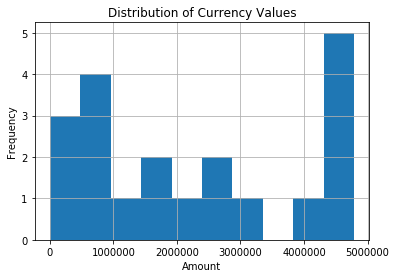

In [203]:
plt.title('Distribution of Currency Values')
plt.xlabel('Amount')
money_clean.plot.hist(grid = True)

#### Use pandas to create a Series from the following exam scores:

```python
[60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78]
```

In [34]:
scores = pd.Series([60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78])

In [35]:
print(f"The lowest score was {scores.min()}.")
print(f"The highest score was {scores.max()}.")

The lowest score was 60.
The highest score was 96.


#### Plot a histogram of the scores.

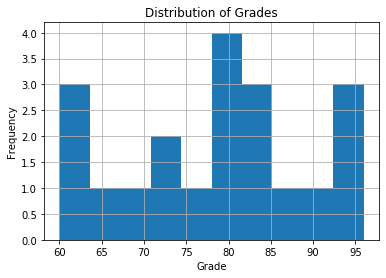

In [200]:
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')
scores.hist()

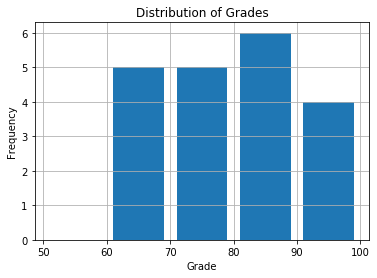

In [202]:
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')
scores.hist(bins = [50, 60, 70, 80, 90, 100],rwidth = .8)

#### Convert each of the numbers above into a letter grade. For example, 86 should be 'B' and 95 should be 'A'.

In [40]:
scores_to_letter = pd.cut(scores, [0, 60, 70, 80, 90, 100], labels = ["F", "D", "C", "B", "A"])
scores_to_letter

0     F
1     B
2     C
3     D
4     A
5     C
6     F
7     B
8     A
9     C
10    D
11    C
12    D
13    B
14    A
15    C
16    B
17    A
18    B
19    C
dtype: category
Categories (5, object): [F < D < C < B < A]

#### Write the code necessary to implement a curve. I.e. that grade closest to 100 should be converted to a 100, and that many points should be given to every other score as well.

In [49]:
curve = 100 - scores.max()
scores_curved = scores + curve
scores_curved

0      64
1      90
2      79
3      66
4      97
5      75
6      64
7      87
8      99
9      82
10     69
11     76
12     73
13     85
14    100
15     84
16     89
17     96
18     86
19     82
dtype: int64

## Use pandas to create a Series from the following string:

```python
'hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'
```

#### What is the most frequently occuring letter? 

In [109]:
letters = list('hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy')

In [112]:
letters = pd.Series(letters)

0      h
1      n
2      v
3      i
4      d
      ..
195    r
196    o
197    g
198    u
199    y
Length: 200, dtype: object

In [117]:
letters_counts = letters.value_counts()
letters_counts.iloc[[0]]

y    13
dtype: int64

In [120]:
top = letters_counts.head(1)
value, count = top.index[0], top.iat[0]
print(value)
print(count)

y
13


#### Least frequently occuring letter?

In [141]:
letters_counts.iloc[[-1]]

l    4
dtype: int64

In [124]:
bottom = letters_counts.tail(1)
least_value, least_count = bottom.index[0], bottom.iat[0]
print(least_value)
print(least_count)

l
4


#### How many vowels are in the list?

In [126]:
sum(letters.str.count('[aeiou]'))

34

#### How many consonants are in the list?

In [130]:
sum(letters.str.count('[^aeiou]'))

166

#### Create a series that has all of the same letters, but uppercased

In [134]:
letters_upper = letters.str.upper()
letters_upper

0      H
1      N
2      V
3      I
4      D
      ..
195    R
196    O
197    G
198    U
199    Y
Length: 200, dtype: object

#### Create a bar plot of the frequencies of the 6 most frequently occuring letters.

In [138]:
top_6 = letters_counts.nlargest(6)
top_6

y    13
p    12
w    10
k     9
n     9
m     9
dtype: int64

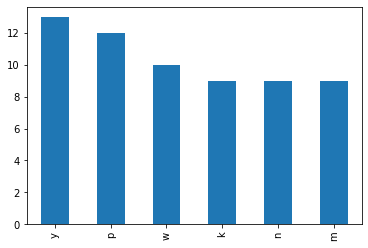

In [139]:
top_6.plot.bar()

## Complete the exercises from https://gist.github.com/ryanorsinger/f7d7c1dd6a328730c04f3dc5c5c69f3a, but use pandas Series for the data structure instead of lists and use Series subsetting/indexing and vectorization options instead of loops and lists.

In [145]:
fruits2 = pd.Series(['mango', 'kiwi', 'strawberry', 'guava', 'pineapple', 'mandarin orange'])

numbers2 = pd.Series([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 17, 19, 23, 256, -8, -4, -2, 5, -9])

#### Exercise 1 - Make a variable named uppercased_fruits to hold the series. Output should be ['MANGO', 'KIWI', etc...]

In [148]:
uppercased_fruits = fruits2.str.upper()
uppercased_fruits

0              MANGO
1               KIWI
2         STRAWBERRY
3              GUAVA
4          PINEAPPLE
5    MANDARIN ORANGE
dtype: object

#### Exercise 2 - create a variable named capitalized_fruits and use vectorization options to produce output like ['Mango', 'Kiwi', 'Strawberry', etc...]

In [149]:
capitalized_fruits = fruits2.str.capitalize()
capitalized_fruits

0              Mango
1               Kiwi
2         Strawberry
3              Guava
4          Pineapple
5    Mandarin orange
dtype: object

#### Exercise 3 - Use vectorization options to make a variable named fruits_with_more_than_two_vowels. Hint: You'll need a way to check if something is a vowel.

In [168]:
from collections import Counter
mask = fruits2.map(lambda c: sum([Counter(c.lower()).get(i, 0) for i in list('aeiou')]) > 2)
fruits_with_more_than_two_vowels = fruits2[mask]
fruits_with_more_than_two_vowels

3              guava
4          pineapple
5    mandarin orange
dtype: object

In [169]:
mask = fruits2.str.lower().str.count('[aeiou]') > 2
fruits_with_more_than_two_vowels = fruits2[mask]
fruits_with_more_than_two_vowels

3              guava
4          pineapple
5    mandarin orange
dtype: object

#### # Exercise 4 - make a variable named fruits_with_only_two_vowels. The result should be ['mango', 'kiwi', 'strawberry']

In [160]:
mask = fruits2.map(lambda c: sum([Counter(c.lower()).get(i, 0) for i in list('aeiou')]) == 2)
fruits_with_only_two_vowels = fruits2[mask]
fruits_with_only_two_vowels

0         mango
1          kiwi
2    strawberry
dtype: object

In [170]:
mask = fruits2.str.lower().str.count('[aeiou]') == 2
fruits_with_only_two_vowels = fruits2[mask]
fruits_with_only_two_vowels

0         mango
1          kiwi
2    strawberry
dtype: object

#### Exercise 5 - make a series that contains each fruit with more than 5 characters

In [163]:
fruits2[fruits2.str.len() >= 5]

0              mango
2         strawberry
3              guava
4          pineapple
5    mandarin orange
dtype: object

#### Exercise 6 - make a series that contains each fruit with exactly 5 characters

In [171]:
fruits2[fruits2.str.len() == 5]

0    mango
3    guava
dtype: object

#### Exercise 7 - Make a series that contains fruits that have less than 5 characters

In [172]:
fruits2[fruits2.str.len() < 5]

1    kiwi
dtype: object

#### Exercise 8 - Make a series containing the number of characters in each fruit. Output would be [5, 4, 10, etc... ]

In [173]:
fruits2.str.len()

0     5
1     4
2    10
3     5
4     9
5    15
dtype: int64

#### Exercise 9 - Make a variable named fruits_with_letter_a that contains a series of only the fruits that contain the letter "a"

In [175]:
fruits_with_letter_a = fruits2[fruits2.str.count('a') > 0]
fruits_with_letter_a

0              mango
2         strawberry
3              guava
4          pineapple
5    mandarin orange
dtype: object

#### Exercise 10 - Make a variable named even_numbers that holds only the even numbers 

In [176]:
even_numbers = numbers2[numbers2 % 2 == 0]
even_numbers

0       2
2       4
4       6
6       8
8      10
14    256
15     -8
16     -4
17     -2
dtype: int64

#### Exercise 11 - Make a variable named odd_numbers that holds only the odd numbers

In [177]:
odd_numbers = numbers2[numbers2 % 2 == 1]
odd_numbers

1      3
3      5
5      7
7      9
9     11
10    13
11    17
12    19
13    23
18     5
19    -9
dtype: int64

#### Exercise 12 - Make a variable named positive_numbers that holds only the positive numbers

In [178]:
positive_numbers = numbers2[numbers2 > 0]
positive_numbers

0       2
1       3
2       4
3       5
4       6
5       7
6       8
7       9
8      10
9      11
10     13
11     17
12     19
13     23
14    256
18      5
dtype: int64

#### Exercise 13 - Make a variable named negative_numbers that holds only the negative numbers

In [179]:
negative_numbers = numbers2[numbers2 < 0]
negative_numbers

15   -8
16   -4
17   -2
19   -9
dtype: int64

#### Exercise 14 - use vectorized operations in order to produce a series of numbers with 2 or more numerals

In [188]:
numbers_with_2_or_more_numerals = numbers2[(numbers2 >= 10) | (numbers2 <= -10)]
numbers_with_2_or_more_numerals

8      10
9      11
10     13
11     17
12     19
13     23
14    256
dtype: int64

#### Exercise 15 - Make a variable named numbers_squared that contains the numbers list with each element squared. Output is [4, 9, 16, etc...]

In [190]:
numbers_squared = numbers2 ** 2
numbers_squared

0         4
1         9
2        16
3        25
4        36
5        49
6        64
7        81
8       100
9       121
10      169
11      289
12      361
13      529
14    65536
15       64
16       16
17        4
18       25
19       81
dtype: int64

#### Exercise 16 - Make a variable named odd_negative_numbers that contains only the numbers that are both odd and negative.



In [191]:
odd_negative_numbers = numbers2[(numbers2 % 2 == 1) & (numbers2 < 0)]
odd_negative_numbers

19   -9
dtype: int64

#### Exercise 17 - Make a variable named numbers_plus_5. In it, return a series containing each number plus five. 

In [192]:
numbers_plus_5 = numbers2 + 5
numbers_plus_5

0       7
1       8
2       9
3      10
4      11
5      12
6      13
7      14
8      15
9      16
10     18
11     22
12     24
13     28
14    261
15     -3
16      1
17      3
18     10
19     -4
dtype: int64

#### BONUS: Make a variable named "primes" that is a series containing the prime numbers in the numbers list. *Hint* you may want to make or find a helper function that determines if a given number is prime or not.

In [193]:
def prime_number_detector(num):
    if num > 1:
        if num == 2:
            return True
        for i in range(2, num):
            if (num % i) == 0:
                return False 
        else: 
            return True
    else: 
        return False

In [198]:
mask = numbers2.apply(prime_number_detector)
primes = numbers2[mask]
primes

0      2
1      3
3      5
5      7
9     11
10    13
11    17
12    19
13    23
18     5
dtype: int64

# END